# Probabilistic Principal Component Analysis (PPCA)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import eigh, inv
from sklearn.datasets import load_iris

In [2]:
%config InlineBackend.figure_format = "retina"
np.set_printoptions(precision=4, suppress=True)

* <span style="color:crimson">PPCA correctly captures the variance of the data along the principal axes, and approximates the varianace in all remaining directions with a single average value $\sigma^2$</span>

* PPCA is principal component analysis as the Maximum Likelihood solution of a probabilistic latent variable model

* In PPCA, we map from latent space to data space given by

$$
    {\bf x}\vert{\bf z} = W{\bf z} + {\boldsymbol\mu} + \boldsymbol\epsilon
$$

Where

1. ${\bf z}$ is a latent variable that models the <span style="color:crimson">principal-component subspace</span>.
2. ${\bf x}$ is the observed variable 
3. $\boldsymbol\epsilon \sim \mathcal{N}\left({\bf 0}, \sigma^2{\bf I}\right)$

and we assume 

$$
    p({\bf z}) = \mathcal{N}\left(z\vert{\bf 0}, {\bf I}\right)
$$

$$
    p({\bf x} \vert {\bf z}) = \mathcal{N}\left({\bf x} \vert W{\bf z} + {\boldsymbol\mu}, \sigma^2{\bf I}\right)
$$

## Maximum Likelihood PCA

For probabilistic PCA, the maximum likelihood parameters are given by

$$
    {\boldsymbol\mu}_{ML} = \bar{\bf x}
$$

$$
    {\bf W}_{ML} = {\bf U}_M({\bf L}_M - \sigma_{ML}^2{\bf I})^{1/2}{\bf R}
$$

$$
    \sigma^2_{ML} = \frac{1}{D - M}\sum_{m=M+1}^D\lambda_m
$$

Where:
*  ${\bf U}_M$ is an $D \times M$ matrix whose columns are given by the $M$ eigenvectors with corresponding largest $M$ eigenvalues
* ${\bf L}_M$ is a diagonal $M\times M$ matrix of the corresponding eigenvectors
* ${\bf R}$ is an arbitrary $M\times M$ matrix

In [3]:
iris = load_iris()
X, y = iris["data"], iris["target"]

M = 2
N, D = X.shape
S = np.cov(X.T)

In [4]:
L, U = eigh(S)
L, U = L[::-1], U[:, ::-1]

Lm = np.identity(M) * L[:M]

In [5]:
mu = X.mean(axis=0)
sigma2 = L[M:].sum() / (D - M)
W = U[:, :M] @ np.sqrt(Lm - sigma2 * np.identity(M))

### Projecting down to $\mathbb{R}^M$

The posterior distributior over the latent space is given by

$$
    p({\bf z}|{\bf x}) = \mathcal{N}\left({\bf M}^{-1}{\bf W}^T({\bf x} - \boldsymbol\mu), \sigma^{-2}{\bf M}\right)
$$

Hence, *expected* projection down to $\mathbb{R}^M$ is given by

$$
    \mathbb{E}[{\bf z} | {\bf x}] = {\bf M}^{-1}{\bf W}^T_{\text{ML}}({\bf x} - \bar{\bf x})
$$

Where

* ${\bf M} = {\bf W}^T{\bf W} + \sigma^2 {\bf I}$.

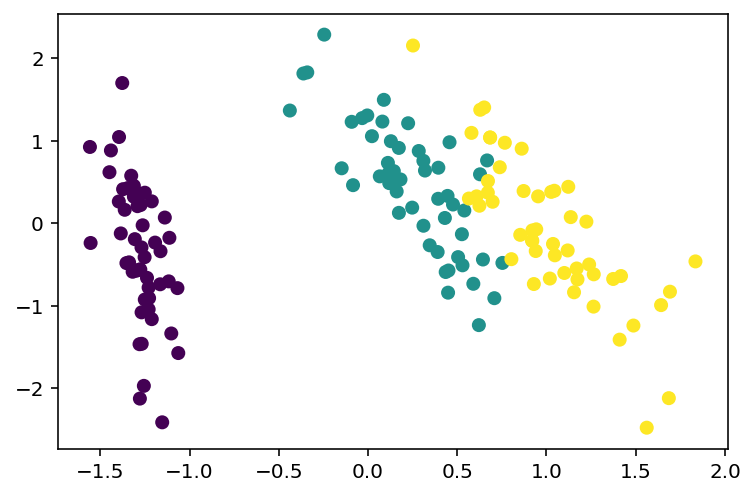

In [21]:
Mx = W.T @ W + sigma2 * np.identity(M)

Ez = inv(Mx) @ W.T @ (X - mu).T

plt.scatter(*Ez, c=y);